In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df1 = pd.read_csv('C:\\Users\\ADMIN11\\Desktop\csv\\Assignment 10-16\\Assignment 10\\trainKNN.csv')
df2 = pd.read_csv('C:\\Users\\ADMIN11\\Desktop\csv\\Assignment 10-16\\Assignment 10\\testKNN.csv')

In [3]:
df1.head()

,Id,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Target
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df1.shape

(196, 11)

In [5]:
df1.describe()

,Id,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Target
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,102.862245,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,61.195663,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.750000,1.516457,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,101.500000,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,153.250000,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,211.000000,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [6]:
df2.shape

(18, 11)

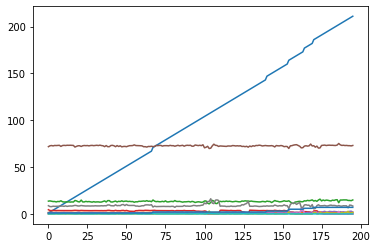

In [7]:
plt.plot(df1)
plt.show()

<AxesSubplot:>

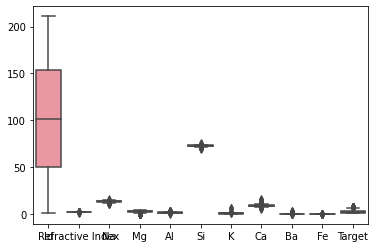

In [8]:
sb.boxplot(data=df1)

In [9]:
x_train = df1.drop('Id',axis=1)
y_train = df1['Target']

In [10]:
x_train

,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
191,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [11]:
x_test = df2.drop('Id',axis=1)
y_test = df2['Target']

In [12]:
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
y_pred = classifier.predict(x_test)

In [14]:
cm = confusion_matrix(y_test,y_pred)
ascore = accuracy_score(y_test,y_pred)
print(cm)
print(ascore)

[[3 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 2 0 1]
 [0 0 0 0 0 3]]
0.7777777777777778


# Classification using Ensemble technique

In [15]:
bag_clf = BaggingClassifier(KNeighborsClassifier(),n_estimators =500,n_jobs=-1,bootstrap=True,oob_score=True,max_features=0.8)
bag_clf.fit(x_train,y_train)
y_pred1 = bag_clf.predict(x_test)
print("Score using Ensemble Technique:",accuracy_score(y_test,y_pred1))

Score using Ensemble Technique: 0.8333333333333334
